In [1]:
import os, sys, glob
from keras import backend as K
import numpy as np
from shutil import copyfile

%matplotlib inline

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


## Preparing the sample,valid sets

In [2]:
homeDir = os.getcwd()

In [3]:
dataHome = homeDir + "/data/"
dataDir = homeDir + "/data/"
#dataDir = homeDir + "/data/sample/"
train_path = dataDir + "train/"
valid_path = dataDir + "valid/"
model_path = dataDir + "models/"
test_path = dataHome + "test/"
results_path = dataDir + "results/"

In [5]:
#Create directories
%cd $dataHome
%mkdir valid
%mkdir models
%mkdir results
#%mkdir -p sample/train
#%mkdir -p sample/valid
#%mkdir -p sample/models



/home/ubuntu/KaggleCompetitions/Fisheries/data


In [ ]:
%cd $train_path

In [ ]:
#copying sample images to sample folder
num_dict = {'ALB':10, 'BET': 10 , 'DOL':10 , 'LAG': 10 , 'NoF':10 , 'OTHER': 10, 'SHARK':10, 'YFT': 10 }
for k,v in num_dict.iteritems():
    make_path = "/home/manpun/Manoj/DL/Comp/Fisheries/data/sample/train/" + k + "/"
    %mkdir -p $make_path
    path = "/home/manpun/Manoj/DL/Comp/Fisheries/data/train"+ '/'+ k 
    %cd $path
    g = glob.glob('*.jpg')
    shuf = np.random.permutation(g)
    for i in range(10): 
        copyfile(shuf[i+1], '/home/manpun/Manoj/DL/Comp/Fisheries/data/sample/train/' + k + '/' + shuf[i+1])

In [ ]:
num_dict = {'ALB':10, 'BET': 10 , 'DOL':10 , 'LAG': 10 , 'NoF':10 , 'OTHER': 10, 'SHARK':10, 'YFT': 10 }

In [ ]:
#sample valid files
for k,v in num_dict.iteritems():
    make_path = "/home/manpun/Manoj/DL/Comp/Fisheries/data/sample/valid/" + k + "/"
    %mkdir -p $make_path
    path = "/home/manpun/Manoj/DL/Comp/Fisheries/data/sample/train"+ "/" +  k 
    %cd $path
    g = glob.glob('*.jpg')
    print len(g)
    shuf = np.random.permutation(g)
    for i in range(2):
        os.rename(shuf[i], "/home/manpun/Manoj/DL/Comp/Fisheries/data/sample/valid/" + k + '/' + shuf[i])

In [6]:
num_dict = {'ALB':200, 'BET': 25 , 'DOL':20 , 'LAG': 10 , 'NoF':50 , 'OTHER': 30, 'SHARK':20 , 'YFT': 80 }

In [7]:
#creating validation files
for k,v in num_dict.iteritems():
    make_path = valid_path + k + "/"
    %mkdir -p $make_path
    path =  train_path + '/'+ k + '/'
    %cd $path
    g = glob.glob('*.jpg')
    shuf = np.random.permutation(g)
    for i in range(v):
        os.rename(shuf[i], valid_path + k + '/' + shuf[i])

/home/ubuntu/KaggleCompetitions/Fisheries/data/train/YFT
/home/ubuntu/KaggleCompetitions/Fisheries/data/train/SHARK
/home/ubuntu/KaggleCompetitions/Fisheries/data/train/OTHER
/home/ubuntu/KaggleCompetitions/Fisheries/data/train/DOL
/home/ubuntu/KaggleCompetitions/Fisheries/data/train/NoF
/home/ubuntu/KaggleCompetitions/Fisheries/data/train/LAG
/home/ubuntu/KaggleCompetitions/Fisheries/data/train/ALB
/home/ubuntu/KaggleCompetitions/Fisheries/data/train/BET


## Real Processing begins here

In [4]:
%cd $homeDir

/home/ubuntu/KaggleCompetitions/Fisheries


In [5]:
from utils import *
from Vgg16 import Vgg16
from vgg16bn import Vgg16BN

In [6]:
vgg = Vgg16()

In [7]:
#Set constants. You can experiment with no_of_epochs to improve the model. You can reduce the batch_size 
#depending on the memory contraints of gpu
batch_size=64
no_of_epochs=1

In [29]:
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size)

Found 3342 images belonging to 8 classes.
Found 435 images belonging to 8 classes.


In [9]:
vgg.model.pop() #Remove the final layer
for layer in vgg.model.layers:
    layer.trainable=False # Set all other layers to untrainable

In [10]:
vgg.model.add(Dense(8, activation='softmax')) 
#Adding a new dense layer wiht only 8 outputs and softmax acitvation as it is the output layer

In [11]:
vgg.compile()
vgg.fit(batches, val_batches, nb_epoch=2)

Epoch 1/2
3342/3342 [==============================] - 183s - loss: 2.1205 - acc: 0.4817 - val_loss: 0.9153 - val_acc: 0.6851
Epoch 2/2
3342/3342 [==============================] - 177s - loss: 1.3139 - acc: 0.6104 - val_loss: 0.7217 - val_acc: 0.7471


In [12]:
vgg.model.save_weights(results_path+'f1LastLayer.h5')

In [20]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
3342/3342 [==============================] - 172s - loss: 1.3503 - acc: 0.6029 - val_loss: 0.6951 - val_acc: 0.7678


In [21]:
vgg.fit(batches, val_batches, nb_epoch=2)

Epoch 1/2
3342/3342 [==============================] - 154s - loss: 1.0988 - acc: 0.6685 - val_loss: 0.5797 - val_acc: 0.8345
Epoch 2/2
3342/3342 [==============================] - 167s - loss: 0.9712 - acc: 0.7151 - val_loss: 0.4216 - val_acc: 0.8805


In [22]:
vgg.model.save_weights(results_path+'f2LastLayer.h5')

In [23]:
vgg.fit(batches, val_batches, nb_epoch=2)

Epoch 1/2
3342/3342 [==============================] - 171s - loss: 0.8243 - acc: 0.7433 - val_loss: 0.4757 - val_acc: 0.8506
Epoch 2/2
3342/3342 [==============================] - 168s - loss: 0.7747 - acc: 0.7460 - val_loss: 0.4003 - val_acc: 0.8529


In [61]:
vgg.model.load_weights(results_path +'f2LastLayer.h5')

In [13]:
layers= vgg.model.layers
dense_layer_idx = [index for index,layer in enumerate(layers) if type(layer) is Dense]
for l in dense_layer_idx:
    layers[l].trainable=True

In [14]:
vgg.compile(lr=0.0001)
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
3342/3342 [==============================] - 169s - loss: 0.9082 - acc: 0.7403 - val_loss: 0.3575 - val_acc: 0.8943


In [30]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
3342/3342 [==============================] - 150s - loss: 0.4082 - acc: 0.8890 - val_loss: 0.2527 - val_acc: 0.9425


In [31]:
vgg.model.save_weights(results_path+'Try3fineTunedAllLayers.h5')

In [32]:
vgg.fit(batches, val_batches, nb_epoch=2)

Epoch 1/2
3342/3342 [==============================] - 110s - loss: 0.2689 - acc: 0.9312 - val_loss: 0.1634 - val_acc: 0.9609
Epoch 2/2
3342/3342 [==============================] - 145s - loss: 0.1926 - acc: 0.9584 - val_loss: 0.3265 - val_acc: 0.9402


In [34]:
# looks like it overfitted the last epoch, lt us retry with lower learning rate.
vgg.model.load_weights(results_path+'Try3fineTunedAllLayers.h5')

In [35]:
vgg.compile(lr=0.00001)

In [36]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
3342/3342 [==============================] - 111s - loss: 0.1376 - acc: 0.9602 - val_loss: 0.1174 - val_acc: 0.9724


In [37]:
vgg.model.save_weights(results_path+'Try3fineTunedAllLayers.h5')

In [38]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
3342/3342 [==============================] - 108s - loss: 0.0806 - acc: 0.9752 - val_loss: 0.1034 - val_acc: 0.9747


In [39]:
vgg.model.save_weights(results_path+'Try3fineTunedAllLayers.h5')

In [49]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
3342/3342 [==============================] - 109s - loss: 0.0524 - acc: 0.9847 - val_loss: 0.1030 - val_acc: 0.9747


Now the results looks good. Looke slightly overfitted now. hence let us tinker with the batchNorm and droput layers.
Also from kaggle results understood that validations results donot correlate with the kaggle results. Hence let us try to create more useful validation set, as well as try data augmentation.

### Batchnormalization and dropout

In [6]:
vgg = Vgg16BN()

In [7]:
#Set constants. You can experiment with no_of_epochs to improve the model. You can reduce the batch_size 
#depending on the memory contraints of gpu
batch_size=64
#no_of_epochs=3

In [8]:
# get_batches function transforms images into arrays and the gets them in batches.
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size)

Found 3342 images belonging to 8 classes.
Found 435 images belonging to 8 classes.


In [9]:
vgg.model.pop() #Remove the final layer
for layer in vgg.model.layers:
    layer.trainable=False # Set all other layers to untrainable

In [10]:
vgg.model.add(Dense(8, activation='softmax')) 
#Adding a new dense layer wiht only 2 outputs and softmax acitvation as it is the output layer

In [11]:
vgg.compile()
vgg.fit(batches, val_batches, nb_epoch=2)

Epoch 1/2
3342/3342 [==============================] - 176s - loss: 2.9960 - acc: 0.4731 - val_loss: 1.4657 - val_acc: 0.6598
Epoch 2/2
3342/3342 [==============================] - 162s - loss: 1.6418 - acc: 0.6403 - val_loss: 0.8154 - val_acc: 0.7770


In [12]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
3342/3342 [==============================] - 167s - loss: 1.2431 - acc: 0.7086 - val_loss: 0.7284 - val_acc: 0.8276


Looks like we can do 2 more epochs

In [13]:
vgg.fit(batches, val_batches, nb_epoch=2)

Epoch 1/2
3342/3342 [==============================] - 168s - loss: 1.0971 - acc: 0.7376 - val_loss: 0.4250 - val_acc: 0.8644
Epoch 2/2
3342/3342 [==============================] - 161s - loss: 0.9260 - acc: 0.7726 - val_loss: 0.4437 - val_acc: 0.9034


In [14]:
vgg.model.save_weights(model_path + 'vgg16bnStarter.h5')

The above model got 1.96, which is not a good score, now let us try to decrease the regularization and modify the model.

In [25]:
model = vgg.model
layers = model.layers
lastConvIdx = [index for index,layer in enumerate(layers) if type(layer) is Convolution2D][-1]
convLayers = layers[:lastConvIdx+1]
convModel = Sequential(convLayers)
fcLayers = layers[lastConvIdx+1:]

In [27]:
batches = get_batches(train_path, shuffle=False, batch_size = batch_size)
val_batches = get_batches(valid_path, shuffle=False, batch_size=batch_size)
val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

Found 3342 images belonging to 8 classes.
Found 435 images belonging to 8 classes.


In [60]:
train_features = convModel.predict_generator(batches,batches.nb_sample)
val_features = convModel.predict_generator(val_batches, val_batches.nb_sample)

In [61]:
save_array(model_path + 'train_convlayer_features.bc', train_features)
save_array(model_path + 'valid_convlayer_features.bc', val_features)

In [28]:
trn_features = load_array(model_path+'train_convlayer_features.bc')
val_features = load_array(model_path+'valid_convlayer_features.bc')

In [29]:
def new_weights(layer, prev_p, new_p):
    scal = (1-prev_p)/(1-new_p)
    return [o*scal for o in layer.get_weights()]
opt = RMSprop(lr=0.00001, rho=0.7)
def get_fc_model(p):
    model = Sequential([
        MaxPooling2D(input_shape = convLayers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096,activation="relu"),
        BatchNormalization(),
        Dropout(p),        
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(8, activation='softmax')
    ])
    for l1,l2 in zip(model.layers, fcLayers): l1.set_weights(new_weights(l2,0.5,p))

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [30]:
fc_model = get_fc_model(0.5)

In [31]:
fc_model.fit(trn_features, trn_labels, nb_epoch=3, 
             batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 3342 samples, validate on 435 samples
Epoch 1/3
3342/3342 [==============================] - 10s - loss: 0.6966 - acc: 0.8199 - val_loss: 0.3855 - val_acc: 0.9425
Epoch 2/3
3342/3342 [==============================] - 9s - loss: 0.4740 - acc: 0.8794 - val_loss: 0.3209 - val_acc: 0.9494
Epoch 3/3
3342/3342 [==============================] - 8s - loss: 0.2924 - acc: 0.9165 - val_loss: 0.2076 - val_acc: 0.9540


In [32]:
# still underfitting but let us run some more epochs
fc_model.fit(trn_features, trn_labels, nb_epoch=3, 
             batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 3342 samples, validate on 435 samples
Epoch 1/3
3342/3342 [==============================] - 11s - loss: 0.2218 - acc: 0.9339 - val_loss: 0.1930 - val_acc: 0.9586
Epoch 2/3
3342/3342 [==============================] - 12s - loss: 0.1447 - acc: 0.9530 - val_loss: 0.1580 - val_acc: 0.9632
Epoch 3/3
3342/3342 [==============================] - 12s - loss: 0.1233 - acc: 0.9644 - val_loss: 0.1527 - val_acc: 0.9655


In [33]:
fc_model.fit(trn_features, trn_labels, nb_epoch=1, 
             batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 3342 samples, validate on 435 samples
Epoch 1/1
3342/3342 [==============================] - 12s - loss: 0.0811 - acc: 0.9716 - val_loss: 0.1561 - val_acc: 0.9724


Since it is massively underfitting let us reduce the dropout

In [67]:
fc_model = get_fc_model(0.4)

In [68]:
fc_model.fit(trn_features, trn_labels, nb_epoch=5, 
             batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 3342 samples, validate on 435 samples
Epoch 1/5
3342/3342 [==============================] - 12s - loss: 0.5860 - acc: 0.8229 - val_loss: 0.3152 - val_acc: 0.9126
Epoch 2/5
3342/3342 [==============================] - 12s - loss: 0.2640 - acc: 0.9183 - val_loss: 0.2023 - val_acc: 0.9471
Epoch 3/5
3342/3342 [==============================] - 12s - loss: 0.1500 - acc: 0.9527 - val_loss: 0.1305 - val_acc: 0.9655
Epoch 4/5
3342/3342 [==============================] - 12s - loss: 0.0805 - acc: 0.9785 - val_loss: 0.1261 - val_acc: 0.9678
Epoch 5/5
3342/3342 [==============================] - 12s - loss: 0.0483 - acc: 0.9844 - val_loss: 0.1056 - val_acc: 0.9701


Looks like it overfitted a little, let us try data augmentation next
### Data augmentation

In [34]:
gen = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1,shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

In [35]:
batches = get_batches(train_path, gen, batch_size=batch_size)
# NB: We don't want to augment or shuffle the validation set
val_batches = get_batches(valid_path, shuffle=False, batch_size=batch_size)

Found 3342 images belonging to 8 classes.
Found 435 images belonging to 8 classes.


In [36]:
final_model = Sequential(convLayers)
for layer in final_model.layers:
    layer.trainable = False
    
for layer in fc_model.layers:
    layer.called_with = None
    final_model.add(layer)

In [37]:
opt = RMSprop(lr=0.00001, rho=0.7)

In [38]:
final_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
final_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=1, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
3342/3342 [==============================] - 127s - loss: 1.5510 - acc: 0.6694 - val_loss: 0.1696 - val_acc: 0.9609


In [50]:
final_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=3, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/3
3342/3342 [==============================] - 173s - loss: 1.2230 - acc: 0.7196 - val_loss: 0.2171 - val_acc: 0.9678
Epoch 2/3
3342/3342 [==============================] - 172s - loss: 1.1947 - acc: 0.7298 - val_loss: 0.2164 - val_acc: 0.9632
Epoch 3/3
3342/3342 [==============================] - 172s - loss: 1.0193 - acc: 0.7675 - val_loss: 0.2380 - val_acc: 0.9655


In [56]:
opt = RMSprop(lr=0.00001, rho=0.7)
final_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
final_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=3, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/3
3342/3342 [==============================] - 103s - loss: 0.9340 - acc: 0.7777 - val_loss: 0.2473 - val_acc: 0.9632
Epoch 2/3
3342/3342 [==============================] - 96s - loss: 0.8778 - acc: 0.7840 - val_loss: 0.2414 - val_acc: 0.9609
Epoch 3/3
3342/3342 [==============================] - 103s - loss: 0.8101 - acc: 0.8088 - val_loss: 0.2274 - val_acc: 0.9678


In [ ]:
final_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=3, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [58]:
test_batches = get_batches(test_path,shuffle=False, batch_size = batch_size)

Found 1000 images belonging to 1 classes.


In [59]:
preds = final_model.predict_generator(test_batches, test_batches.nb_sample)

In [60]:
filenames = test_batches.filenames

In [61]:
#temp
#preds = final_model.predict_generator(test_batches, test_batches.nb_sample)
files = [s.split('/')[-1] for s in filenames]
import pandas as pd
df = pd.DataFrame(preds, columns=['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT'])
df.insert(0,'image', files)
subFile = results_path + 'da7.csv'
df.to_csv(subFile, index=False)

## Predictions

In [15]:
tbatches, preds = vgg.test(test_path, batch_size = 64)

Found 1000 images belonging to 1 classes.


In [38]:
preds[0:5]

array([[  4.1374e-01,   3.5763e-02,   2.5991e-03,   1.1184e-05,   4.9911e-02,   1.2262e-01,
          6.6333e-07,   3.7535e-01],
       [  3.1940e-01,   5.9486e-04,   4.3254e-05,   7.1339e-08,   7.2028e-04,   3.2089e-01,
          1.8859e-03,   3.5647e-01],
       [  3.8538e-01,   2.2137e-05,   2.3614e-06,   1.5163e-08,   4.6274e-01,   2.3706e-03,
          1.2772e-01,   2.1769e-02],
       [  5.9941e-01,   1.0215e-05,   1.3863e-06,   4.5345e-08,   9.6447e-06,   8.5596e-03,
          7.7685e-04,   3.9123e-01],
       [  7.0487e-01,   2.1070e-04,   1.7556e-04,   1.7079e-07,   1.5947e-03,   1.0204e-04,
          3.1526e-07,   2.9305e-01]], dtype=float32)

In [16]:
filenames = tbatches.filenames
filenames[0:5]

['unnames/img_06237.jpg',
 'unnames/img_06893.jpg',
 'unnames/img_02082.jpg',
 'unnames/img_06261.jpg',
 'unnames/img_03628.jpg']

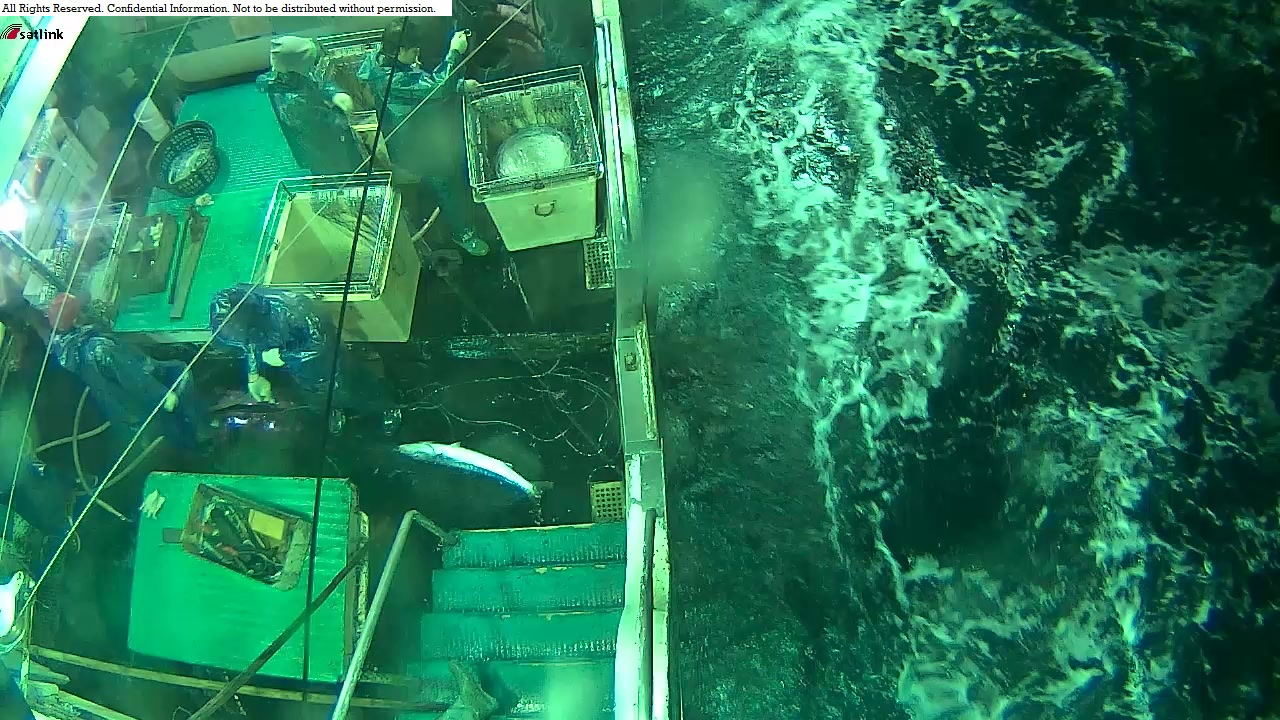

In [28]:
from PIL import Image
Image.open(test_path + filenames[2])

In [40]:
#Save our test results arrays so we can use them again later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

## Validating our results

In [50]:
vgg.model.load_weights(results_path+'allLayers.h5')

In [51]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 16 images belonging to 8 classes.


In [52]:
filenames = val_batches.filenames
expected_labels = val_batches.classes 

In [73]:
myClasses = [img.index(max(img)) for img in probs]

In [74]:
myClasses

[6, 4, 2, 1, 2, 2, 3, 5, 4, 4, 0, 6, 6, 6, 6, 2]

In [75]:
expected_labels

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7], dtype=int32)

## Submissions to kaggle

In [41]:
preds = load_array(results_path + 'test_preds.dat')
filenames = load_array(results_path + 'filenames.dat')

In [17]:
len(filenames)

1000

In [43]:
files = [s.split('/')[-1] for s in filenames]

In [44]:
import pandas as pd

In [45]:
df = pd.DataFrame(preds, columns=['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT'])

In [46]:
df.insert(0,'image', files)

In [47]:
df.head(5)

,image,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
0,img_06237.jpg,0.091948,4.859215e-03,4.802104e-05,3.725542e-06,2.285461e-04,9.026662e-01,9.707434e-06,0.000236
1,img_06893.jpg,0.384323,1.609198e-05,1.903561e-05,9.938520e-07,1.486550e-03,5.132273e-02,5.141425e-01,0.048689
2,img_02082.jpg,0.008593,4.607005e-09,9.059410e-06,2.925744e-09,9.842319e-01,8.597945e-05,7.052931e-03,0.000027
3,img_06261.jpg,0.998487,1.402637e-12,3.336149e-14,5.572100e-14,6.096502e-10,1.350931e-07,4.069957e-09,0.001513
4,img_03628.jpg,0.976311,2.155697e-09,4.602943e-08,3.651624e-09,5.943467e-07,2.481798e-06,1.184796e-10,0.023686


In [48]:
subFile = results_path + 'da1.csv'

In [49]:
df.to_csv(subFile, index=False)

In [52]:
from IPython.display import FileLink
FileLink(subFile)

/home/ubuntu/KaggleCompetitions/Fisheries/data/results/finetunedDenseLayers.csv

## Improvements
We are massively underfitting the model, hence remove the dropout layers and try.